# Injecting custom-implemented LearnablePrompt in Instruct-Pix2Pix and comparing with the default model.

In [3]:
from diffusers import StableDiffusionInstructPix2PixPipeline
from learnable_prompt import LearnablePrompt
from prompt_tuning_attack.src.utils import open_image, display_image

import clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)
model = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    "timbrooks/instruct-pix2pix",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
    safety_checker=None,
).to(device)

clip_model= clip.load("ViT-L/14", device=device)[0]

Using device: cuda


Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  7.88it/s]
/users/eleves-b/2024/mattia.martino/env_cv/lib64/python3.9/site-packages/clip/clip.py:57: UserWarning: /users/eleves-b/2024/mattia.martino/.cache/clip/ViT-L-14.pt exists, but the SHA256 checksum does not match; re-downloading the file
  warnings.warn(f"{download_target} exists, but the SHA256 checksum does not match; re-downloading the file")
100%|███████████████████████████████████████| 890M/890M [00:26<00:00, 35.1MiB/s]


100%|██████████| 50/50 [00:08<00:00,  5.58it/s]


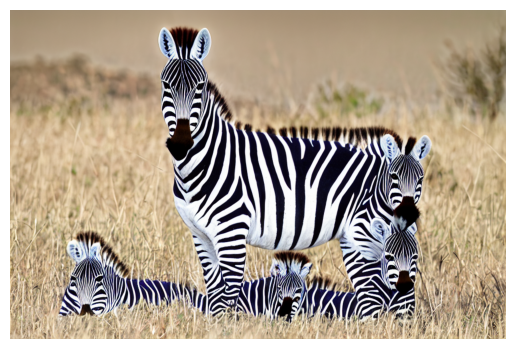

In [44]:
image = open_image("zebra.jpg")
output = model(
    "Make this zebra british",
    image=  image,
    num_inference_steps=50,
    guidance_scale=7.5,
    negative_prompt=""
)

display_image(output.images[0])

In [15]:
trial_prompt = LearnablePrompt(
    device=device, 
    template="Make the zebra a jaguar", 
    ctx_len=10, 
    clip_model = clip_model
)

trial_negative_prompt = LearnablePrompt(
    device=device, 
    template="bad quality, blurry, low resolution", 
    ctx_len=0, 
    clip_model = clip_model
)

In [16]:
output2 = model(
    prompt_embeds = trial_prompt(),
    image=  image,
    num_inference_steps=50,
    guidance_scale=7.5,
    negative_embeds = trial_negative_prompt(),
)

100%|██████████| 50/50 [00:08<00:00,  5.64it/s]


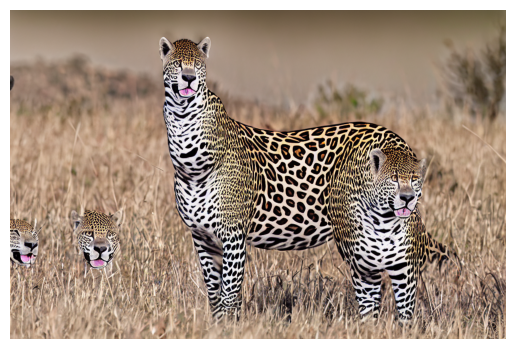

In [17]:
display_image(output2.images[0])